## QQ plot

Check if the given data is Normal

data = [52.53,52.66,52.86,53,53.04,53.07,53.13,53.16,53.23,53.26,53.5]

In [3]:
import statsmodels.api as sm
import scipy.stats as ss
from scipy.stats import norm
import pylab
import numpy as np
import matplotlib.pyplot as plt

## calculate manually

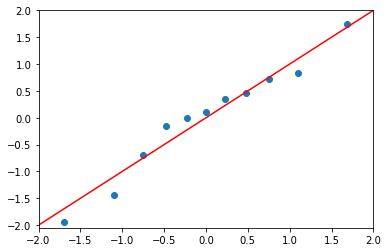

In [4]:
my_data = np.array([52.53,52.66,52.86,53,53.04,53.07,53.13,53.16,53.23,53.26,53.5])
mean = np.mean(my_data)
std_dev=  np.std(my_data)

# calculate the theoritical quantiles and data quantiles
data_quantiles = [(j-mean)/std_dev for j in my_data]
data_quantiles = np.array(data_quantiles)

theoritical_probs = [(i - 0.5)/len(my_data) for i in range(1,len(my_data)+1)]
theoritical_quantiles = ss.norm.ppf(theoritical_probs)


## plot the graph
plt.scatter(theoritical_quantiles,data_quantiles)
plt.xlim(-2,2)
plt.ylim(-2.05,2)
plt.axline([0,0],[1,1],color='r')

## calculate from library

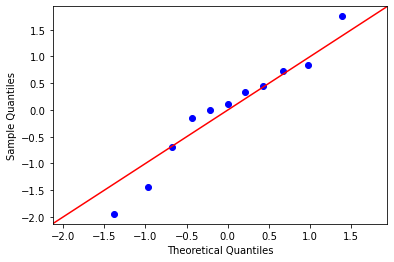

In [5]:
sm.qqplot(data_quantiles, line='45')
pylab.show()

------------------------------------------------------------------

# Statistical Normality Test
## Shapiro wilk test

Null Hypothesis H0 : The given dataset is Normal

Alternate Hypotheis: The given dataset is not Normal

In [6]:
from scipy.stats import shapiro

In [7]:
my_data = np.array([52.53,52.66,52.86,53,53.04,53.07,53.13,53.16,53.23,53.26,53.5])

In [8]:
stat, p = shapiro(my_data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.964, p=0.824
Sample looks Gaussian (fail to reject H0)


## D’Agostino’s K^2 Test

In [9]:
from scipy.stats import normaltest

In [10]:
stat, p = normaltest(my_data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.652, p=0.722
Sample looks Gaussian (fail to reject H0)


C:\Users\jayat\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Anderson Darling test

In [11]:
from scipy.stats import anderson

In [12]:
result = anderson(my_data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.263
15.000: 0.498, data looks normal (fail to reject H0)
10.000: 0.567, data looks normal (fail to reject H0)
5.000: 0.680, data looks normal (fail to reject H0)
2.500: 0.793, data looks normal (fail to reject H0)
1.000: 0.944, data looks normal (fail to reject H0)


## kolmogorov smirnov test

In [13]:
from scipy.stats import kstest

In [22]:
result = kstest(my_data,'norm')
print(result)
alpha = 0.05
if result.pvalue > alpha:
    print("accept null hypothesis")
else:
    print("reject Null hypothesis")

KstestResult(statistic=1.0, pvalue=0.0)
reject Null hypothesis
